**Project Details**

| | Details |
|----------|---------|
| Author   | Alfrethanov Christian Wijaya |
| Dataset  | Star3642_balanced.csv |
| Goal     | Perform classification on Stellar dataset with HR Classification system. |

# Business Understanding
### Klasifikasi Stellar menggunakan data spektral bintang untuk mengkategorikannya ke dalam kategori yang berbeda. Sistem klasifikasi bintang modern dikenal sebagai sistem klasifikasi Morgan–Keenan (MK). Ini menggunakan sistem klasifikasi HR lama untuk mengkategorikan bintang dengan kromatisitasnya dan menggunakan angka Romawi untuk mengkategorikan ukuran bintang. Dalam Dataset ini, kita akan menggunakan Magnitudo Absolut dan Indeks Warna B-V untuk Mengidentifikasi Raksasa dan Kurcaci. Pada Dataset ini memiliki beberapa fitur dari bintang. 
  1. Vmag Visual magnitude dari bintang.
  2. Plx Jarak antara bintang dan bumi.
  3. e_Plx Standar error dari Plx.
  4. B-V Warna index (Bintang panas memiliki indeks warna B-V mendekati 
  0 atau negatif, sedangkan bintang dingin memiliki indeks warna B-V 
  mendekati 2,0).
  5. SpType Tipe Sprektral
  6. Amag Besaran mutlak bintang
  7. TargetClass Penentu apakah bintang kerdil (0) atau raksasa (1)

### Jadi pada dataset ini akan menentukan suatu klasifikasi suatu stellar atau bintang itu raksasa ataupun kerdil berdasarkan fitur-fitur data yang ada.




# Import Dataset From Google Drive (CSV)

## Data Understanding

In [ ]:
# Import library-library yang dibutuhkan
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

In [ ]:
dataset = pd.read_csv('Star3642_balanced.csv')
dataset.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [ ]:
dataset.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


# Encoding Data
## Encode data value from object to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

for c in dataset.columns[0:]:  
    if(dataset[c].dtype=='object'): 
        dataset[c] = encoder.fit_transform(dataset[c])
    else: 
        dataset[c] = dataset[c]

dataset.head() 

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1


# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

y = dataset['TargetClass']
x = dataset.drop(['TargetClass', 'Vmag', 'Plx', 'Amag', 'e_Plx'], axis = 1)

# Split the dataset to trainand test data
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, random_state=0)

# Normalization Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# K-Nearest Neighbors (Modelling)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "algorithm" : "auto",
    "leaf_size" : 30,
    "metric" : "euclidean",
    "metric_params" : None,
    "n_jobs" : 1,
    "n_neighbors" : 6,
    "p": 2,
    "weights" : "uniform"
}

KNN = KNeighborsClassifier(**parameters)

In [ ]:
KNN.fit(train_x, train_y)

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=6)

In [ ]:
KNN_Predictions = KNN.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(test_y, KNN_Predictions,labels=[1,0])
print('<------- Confusion matrix ------->\n', matrix)

<------- Confusion matrix ------->
 [[320  39]
 [ 42 328]]


In [ ]:
tp, fn, fp, tn = confusion_matrix(test_y, KNN_Predictions,labels=[1,0]).reshape(-1)
print(f'<-------- Outcome values -------->\n True Positive (TP) \t: {tp} \n False Negative (FN) \t: {fn} \n False Positive (FP) \t: {fp} \n True Negative (TN) \t: {tn}')

<-------- Outcome values -------->
 True Positive (TP) 	: 320 
 False Negative (FN) 	: 39 
 False Positive (FP) 	: 42 
 True Negative (TN) 	: 328


In [ ]:
matrix = classification_report(test_y, KNN_Predictions,labels=[1,0])
print('<--------------- Classification report --------------->\n', matrix)

<--------------- Classification report --------------->
               precision    recall  f1-score   support

           1       0.88      0.89      0.89       359
           0       0.89      0.89      0.89       370

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



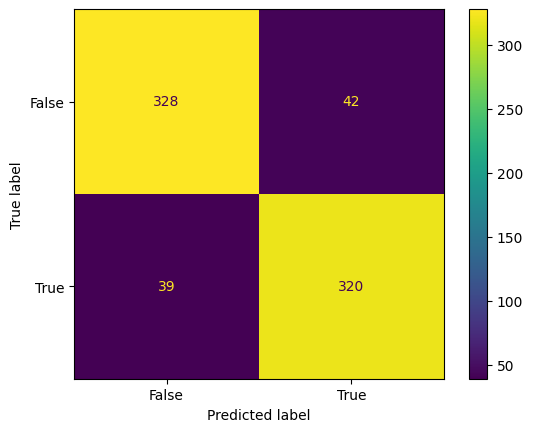

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_y, KNN_Predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(x)

        B-V  SpType
0     1.318     522
1    -0.045      99
2     0.855     337
3    -0.015     150
4     0.584     293
...     ...     ...
3637  1.786     515
3638  0.408     208
3639  1.664     539
3640  0.210      53
3641  1.176     454

[3642 rows x 2 columns]


# Visualization

<ipython-input-17-74e7615f9297>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],


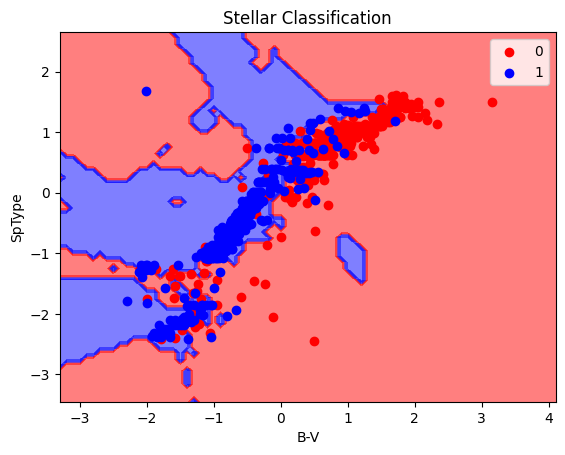

In [ ]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from matplotlib.colors import ListedColormap
x_set, y_set = test_x, test_y
y_set_one_dimension = y_set

x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.1),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step = 0.1))
plt.contourf(x1,x2, KNN.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red','blue')))

for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set_one_dimension == j, 0], x_set[y_set_one_dimension == j, 1],
              c = ListedColormap(('red','blue'))(i), label = j)
plt.title('Stellar Classification')
plt.xlabel('B-V')
plt.ylabel('SpType')
plt.legend()
plt.show()